# Nama: Maximilian Sulistiyo
# NIM: 13522061

# 1 Import Libraries and Images

Import libraries

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Import images

In [26]:
from skimage import data 
cameraman = data.camera()
coin = data.coins()
checkerboard = data.checkerboard()
maisan = cv2.imread("../test_pictures/maisan.png", cv2.IMREAD_GRAYSCALE)
seiko = cv2.imread("../test_pictures/seiko_panda.jpg", cv2.IMREAD_GRAYSCALE)

# 2 Feature Points Function

In [ ]:
def detect_harris_corners(image, block_size=2, ksize=3, k=0.04):
    """
    Detect corners using Harris Corner Detection
    """
    # Convert to float32
    gray = np.float32(image)
    
    # Harris corner detection
    harris_response = cv2.cornerHarris(gray, block_size, ksize, k)
    
    # Dilate to mark the corners
    harris_response = cv2.dilate(harris_response, None)
    
    # Threshold for optimal corner detection (0.01 * max response)
    threshold = 0.01 * harris_response.max()
    
    # Create output image with color (for marking)
    if len(image.shape) == 2:
        output = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        output = image.copy()
    
    # Mark corners in red
    corner_coords = np.where(harris_response > threshold)
    output[corner_coords] = [255, 0, 0]
    
    num_corners = len(corner_coords[0])
    
    
    return output, num_corners, harris_response

In [ ]:
def harris_stats_from_outputs(
    image, block_size=2, ksize=3, k=0.04,
    threshold_frac=0.01,
    save_txt_path=None, 
):
    """
    Save stats
    """
    output, num_corners, harris_response = detect_harris_corners(
        image, block_size=block_size, ksize=ksize, k=k
    )

    thr = float(threshold_frac) * float(harris_response.max())
    ys, xs = np.where(harris_response > thr)

    # Build patch responses
    responses = harris_response[ys, xs]

    # Summary stats (safe if empty)
    if num_corners > 0:
        R_mean   = float(np.mean(responses))
        R_std    = float(np.std(responses))
        R_min    = float(np.min(responses))
        R_med    = float(np.median(responses))
        R_p90    = float(np.percentile(responses, 90))
        R_max    = float(np.max(responses))
    else:
        R_mean = R_std = R_min = R_med = R_p90 = R_max = float("nan")

    stats = {
        "num_corners": num_corners,
        "threshold_frac": float(threshold_frac),
        "block_size": int(block_size),
        "ksize": int(ksize),
        "k": float(k),
        "R_mean": R_mean,
        "R_std": R_std,
        "R_min": R_min,
        "R_median": R_med,
        "R_p90": R_p90,
        "R_max": R_max,
    }

    if save_txt_path is not None:
        p = Path(save_txt_path)
        p.parent.mkdir(parents=True, exist_ok=True)
        with p.open("w", encoding="utf-8") as f:
            f.write("# Harris Corner Statistics\n")
            f.write(f"block_size        : {stats['block_size']}\n")
            f.write(f"ksize             : {stats['ksize']}\n")
            f.write(f"k                 : {stats['k']}\n")
            f.write(f"threshold_frac    : {stats['threshold_frac']}\n")
            f.write(f"num_corners       : {stats['num_corners']}\n")
            f.write(f"R_mean            : {stats['R_mean']:.6f}\n")
            f.write(f"R_std             : {stats['R_std']:.6f}\n")
            f.write(f"R_min             : {stats['R_min']:.6f}\n")
            f.write(f"R_median          : {stats['R_median']:.6f}\n")
            f.write(f"R_p90             : {stats['R_p90']:.6f}\n")
            f.write(f"R_max             : {stats['R_max']:.6f}\n")

    return output, num_corners, harris_response, stats

# 3 Testing

In [65]:
def test_feature_points(image, image_name, block_size, ksize, k):
    harris_points, harris_count, harris_response = detect_harris_corners(image, block_size, ksize, k)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(harris_points)
    axes[1].set_title(f'Harris: {harris_count} corners')
    axes[1].axis('off')

    axes[2].imshow(harris_response, cmap='jet')
    axes[2].set_title('Corner Response')
    axes[2].axis('off')

    # Save iamge with markings
    cv2.imwrite(f"{image_name}_harris_corners.png", harris_points)
    # Save stats
    harris_stats_from_outputs(image, block_size, ksize, k, save_txt_path=f"{image_name}_stats")


## 3.1 Cameraman

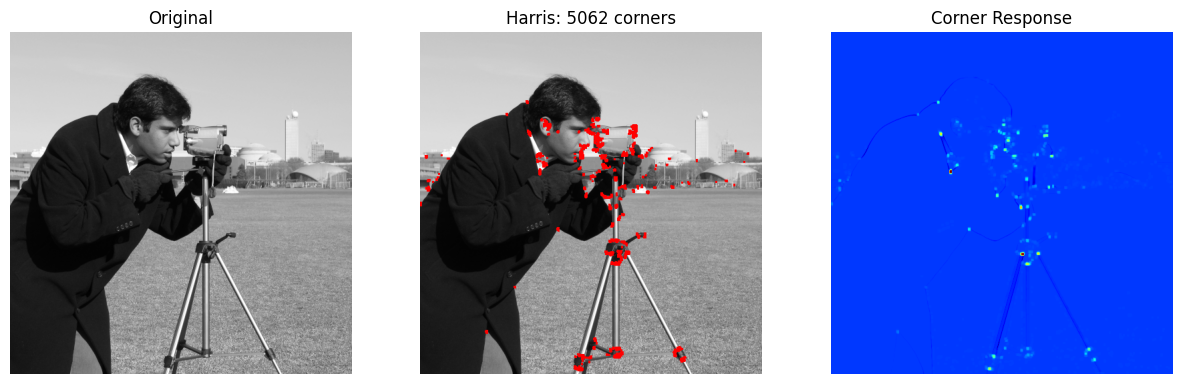

In [66]:
test_feature_points(cameraman, "Cameraman", block_size=3, ksize=7, k=0.04)

## 3.2 Coin

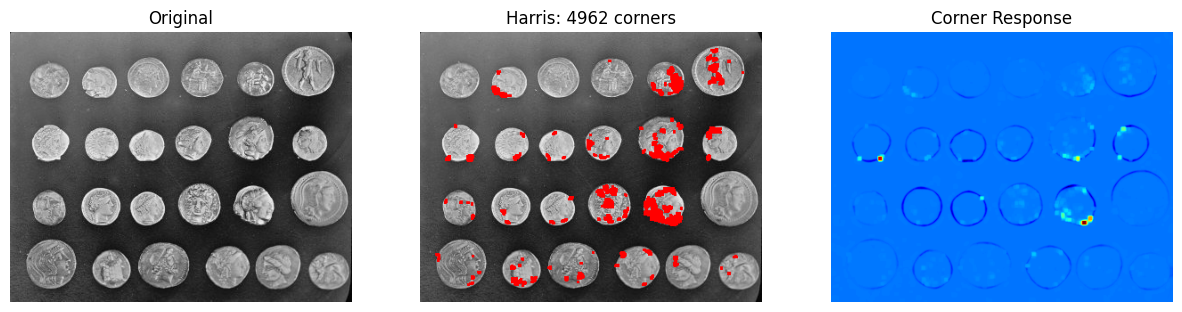

In [67]:
test_feature_points(coin, "Coins", block_size=5, ksize=7, k=0.05)

## 3.3 Checkerboard

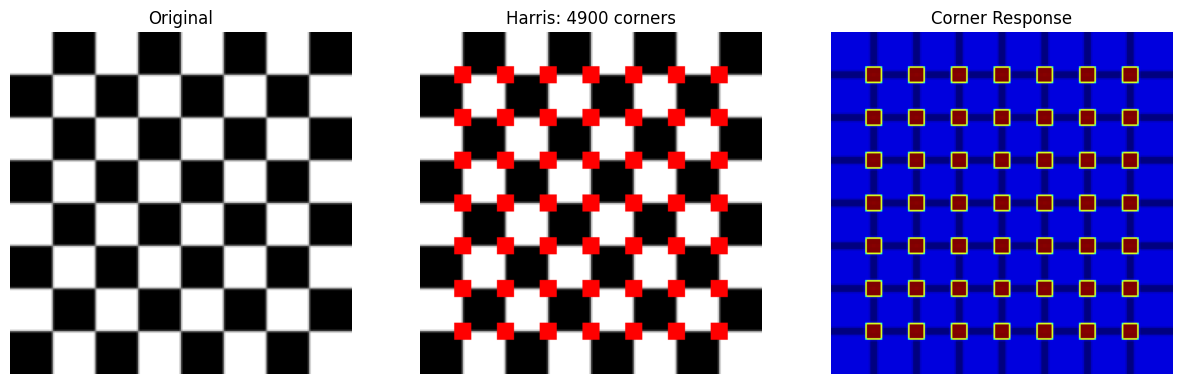

In [68]:
test_feature_points(checkerboard, "Checkerboard", block_size=7, ksize=3, k=0.04)

## 3.4 Mai-san

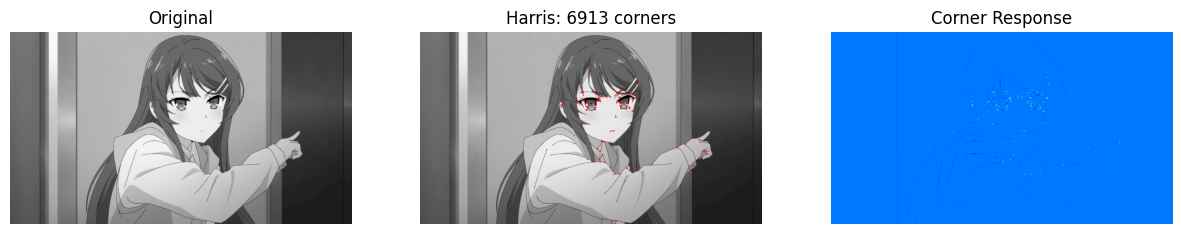

In [69]:
test_feature_points(maisan, "Mai-san", block_size=3, ksize=3, k=0.06)

## 3.5 Seiko

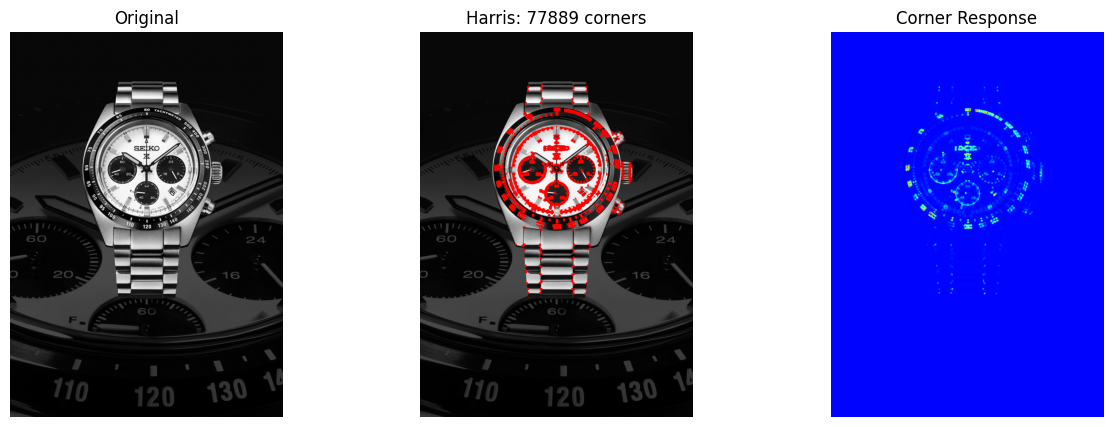

In [70]:
test_feature_points(seiko, "Seiko", block_size=7, ksize=7, k=0.04)